### kmean

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Đọc dữ liệu từ file CSV
data = pd.read_csv('Wholesale customers data.csv')

data['Region'].unique()
data['Channel'].unique()

array([2, 1], dtype=int64)

In [5]:
# Xác định số cụm
k_values = range(2, 11)  # thử từ 2 đến 10 cụm
silhouette_scores = []

# Thử các giá trị của k để tìm k tốt nhất
for k in k_values:
    kmeans = KMeans(n_clusters=k)
    cluster_labels = kmeans.fit_predict(data)
    silhouette_avg = silhouette_score(data, cluster_labels)
    silhouette_scores.append(silhouette_avg)


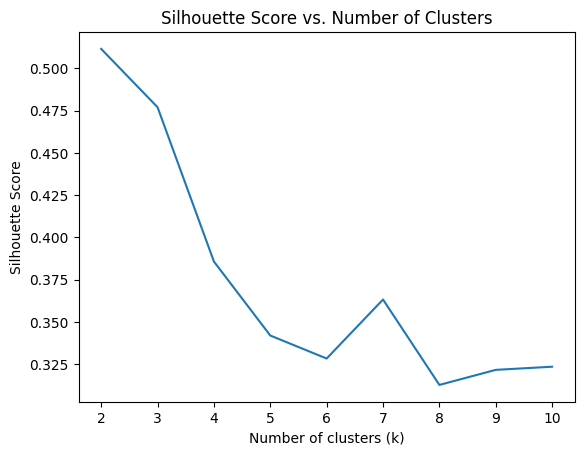

Best value of k: 2
Cluster sizes:
Cluster
1    375
0     65
Name: count, dtype: int64
Cluster centroids:
[[1.21538462e+00 2.63076923e+00 3.54013692e+04 9.51423077e+03
  1.03463692e+04 6.46309231e+03 2.93304615e+03 3.31684615e+03]
 [1.34133333e+00 2.52800000e+00 7.94411200e+03 5.15181867e+03
  7.53612800e+03 2.48413067e+03 2.87255733e+03 1.21426133e+03]]


In [6]:
# Vẽ biểu đồ silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

# Chọn giá trị k tốt nhất
best_k = k_values[np.argmax(silhouette_scores)]
print("Best value of k:", best_k)

# Huấn luyện mô hình KMeans với giá trị k tốt nhất
best_kmeans = KMeans(n_clusters=best_k)
best_cluster_labels = best_kmeans.fit_predict(data)

# Thêm nhãn cụm vào dữ liệu
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = best_cluster_labels

# In ra kích thước của từng cụm
cluster_sizes = data_with_clusters['Cluster'].value_counts()
print("Cluster sizes:")
print(cluster_sizes)

# Hiển thị các centroid của từng cụm
centroids = best_kmeans.cluster_centers_
print("Cluster centroids:")
print(centroids)

# Dùng các thuật toán sau cho phân cụm:  Agglomerative Hierarchical, DBSCAN, CLIQUE

### Agglomerative Hierarchical

In [7]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

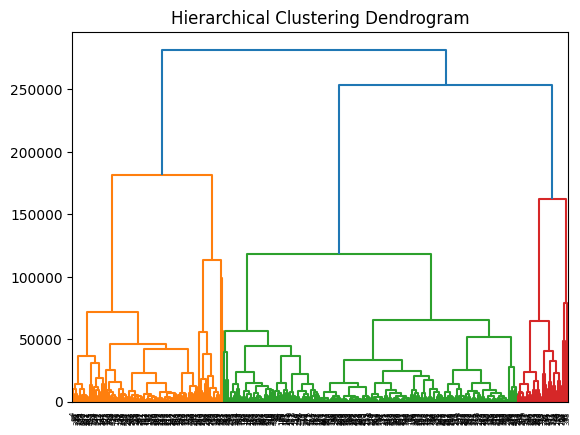

Cluster sizes:
Cluster
2    261
0    134
1     45
Name: count, dtype: int64


In [24]:
# Xây dựng ma trận liên kết cho hierarchical clustering
linkage_matrix = linkage(data, 'ward')  # 'ward' là một phương pháp linkage

# Vẽ dendrogram
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

# Áp dụng Agglomerative Hierarchical Clustering
n_clusters = 3  # Chọn số cụm dựa trên dendrogram
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')
agg_labels = agg_cluster.fit_predict(data)

# Thêm nhãn cụm vào dữ liệu
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = agg_labels

# Hiển thị kích thước của từng cụm
cluster_sizes = data_with_clusters['Cluster'].value_counts()
print("Cluster sizes:")
print(cluster_sizes)


### DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [11]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Áp dụng DBSCAN
eps = 0.5  # Bán kính
min_samples = 5  # Số lượng điểm tối thiểu trong mỗi cụm
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan_labels = dbscan.fit_predict(scaled_data)

# Thêm nhãn cụm vào dữ liệu
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = dbscan_labels

# Hiển thị kích thước của từng cụm
cluster_sizes = data_with_clusters['Cluster'].value_counts()
print("Cluster sizes:")
print(cluster_sizes)


Cluster sizes:
Cluster
-1    255
 1    130
 5     22
 4      7
 6      6
 0      5
 3      5
 2      5
 7      5
Name: count, dtype: int64


### CLIQUE

In [18]:
from pyclustering.cluster.clique import clique, clique_visualizer
import pandas as pd

Cluster 1 - Number of points: 425
Points: [196, 198, 199, 202, 203, 204, 206, 208, 210, 212, 213, 215, 217, 219, 220, 221, 222, 224, 225, 227, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 246, 247, 248, 249, 250, 252, 253, 254, 255, 256, 257, 259, 260, 261, 262, 263, 265, 267, 269, 270, 271, 272, 294, 296, 299, 307, 308, 310, 311, 313, 314, 316, 317, 318, 320, 321, 322, 323, 324, 326, 327, 328, 329, 330, 332, 336, 337, 338, 339, 197, 200, 201, 205, 207, 209, 211, 214, 216, 218, 223, 226, 230, 245, 251, 264, 266, 268, 293, 295, 297, 298, 300, 301, 302, 303, 304, 305, 306, 309, 312, 315, 319, 331, 334, 335, 3, 8, 15, 17, 19, 21, 22, 26, 27, 29, 30, 31, 32, 33, 34, 36, 40, 41, 50, 51, 54, 55, 58, 59, 64, 66, 68, 69, 70, 71, 72, 75, 76, 78, 79, 80, 83, 87, 88, 89, 90, 91, 95, 97, 98, 99, 104, 105, 110, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 124, 126, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 

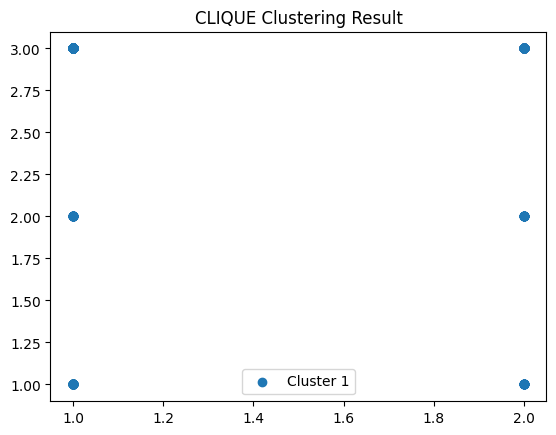

In [22]:
# Chuyển đổi dữ liệu thành danh sách các điểm
points = data.values.tolist()

# Thiết lập tham số cho thuật toán CLIQUE
threshold = 2  # Ngưỡng
grid = 10  # Kích thước ô lưới

# Áp dụng CLIQUE
clique_instance = clique(points, threshold, grid)
clique_instance.process()
clusters = clique_instance.get_clusters()

# Hiển thị kết quả và in thêm thông tin chi tiết
fig, ax = plt.subplots()

for idx, cluster in enumerate(clusters):
    cluster_points = list(zip(*[points[i] for i in cluster]))
    ax.scatter(cluster_points[0], cluster_points[1], label=f'Cluster {idx + 1}')

    # In chi tiết về từng cụm
    print(f"Cluster {idx + 1} - Number of points: {len(cluster)}")
    print("Points:", cluster)

ax.set_title('CLIQUE Clustering Result')
ax.legend()
plt.show()